# 单变量线性回归

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from linear_regression import LinearRegression

### 导入数据

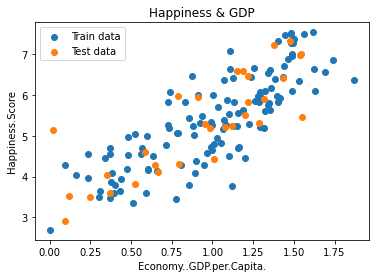

In [2]:
data = pd.read_csv('data/world_happiness_report2017.csv')
# 得到训练与测试数据
train_data = data.sample(frac=0.8)
test_data = data.drop(train_data.index)

input_param_name = 'Economy..GDP.per.Capita.'
output_param_name = 'Happiness.Score'

x_train = train_data[[input_param_name]].values
y_train = train_data[[output_param_name]].values

x_test = test_data[[input_param_name]].values
y_test = test_data[[output_param_name]].values

plt.scatter(x_train, y_train, label = 'Train data')
plt.scatter(x_test, y_test, label = 'Test data')
plt.xlabel(input_param_name)
plt.ylabel(output_param_name)
plt.title('Happiness & GDP')
plt.legend()
plt.show()

### 模型训练

开始时的损失： 1828.9301200816556
训练后的损失： 26.640136896853676


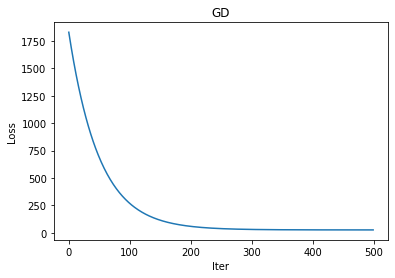

In [3]:
num_iterations = 500
lr = 0.01

linear_regression = LinearRegression(x_train, y_train)
(theta, loss_history) = linear_regression.train(lr, num_iterations)

print('开始时的损失：', loss_history[0])
print('训练后的损失：', loss_history[-1])

plt.plot(range(num_iterations), loss_history)
plt.xlabel('Iter')
plt.ylabel('Loss')
plt.title('GD')
plt.show()

### 测试

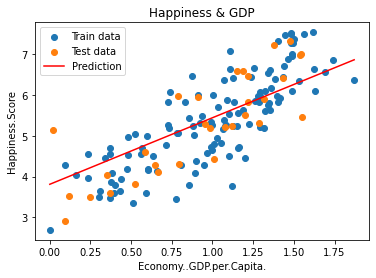

In [4]:
preditions_num = 100
x_predictions = np.linspace(x_train.min(), x_train.max(), preditions_num).reshape(preditions_num, 1)
y_predictions = linear_regression.predict(x_predictions)

plt.scatter(x_train, y_train, label = 'Train data')
plt.scatter(x_test, y_test, label = 'Test data')
plt.plot(x_predictions, y_predictions, 'r', label='Prediction')
plt.xlabel(input_param_name)
plt.ylabel(output_param_name)
plt.title('Happiness & GDP')
plt.legend()
plt.show()